In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

file_path = 'C:/Users/Sidharth/Downloads/Titanic-Dataset.csv'
titanic_df = pd.read_csv(file_path)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
print("Missing values before handling:")
print(titanic_df.isnull().sum())

# Fill missing values in 'Age' with the median age
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

# Fill missing values in 'Embarked' with the most common port
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

# Drop the 'Cabin' column since it has too many missing values
titanic_df = titanic_df.drop('Cabin', axis=1)

# Print the count of missing values in each column after handling them
print("\nMissing values after handling:")
print(titanic_df.isnull().sum())

Missing values before handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


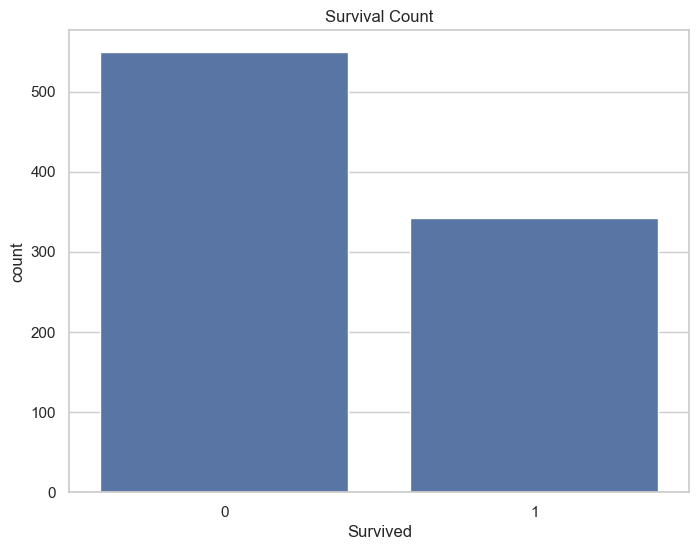

In [23]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival Count')
plt.show()

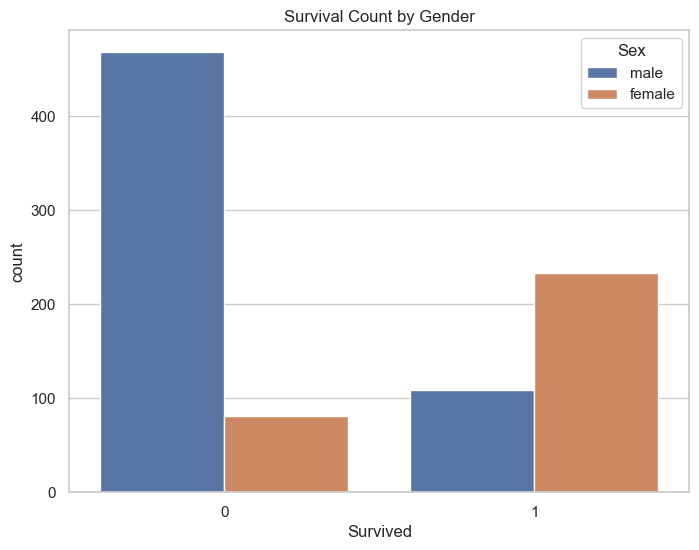

In [24]:
# Plot the survival rate by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=titanic_df)
plt.title('Survival Count by Gender')
plt.show()

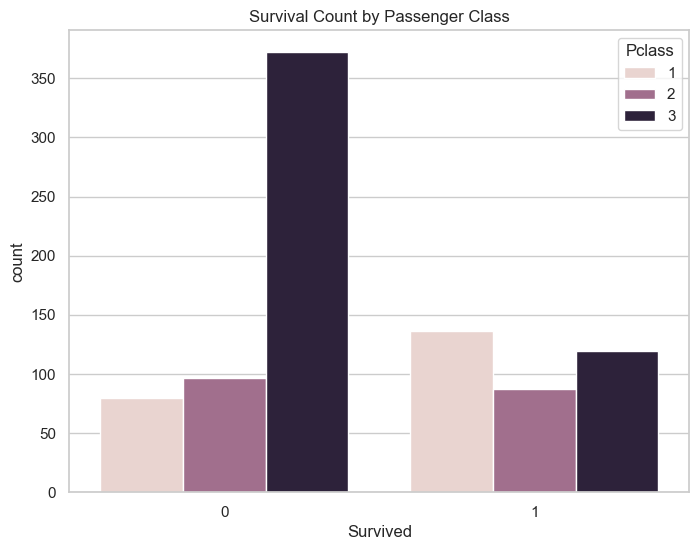

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Pclass', data=titanic_df)
plt.title('Survival Count by Passenger Class')
plt.show()

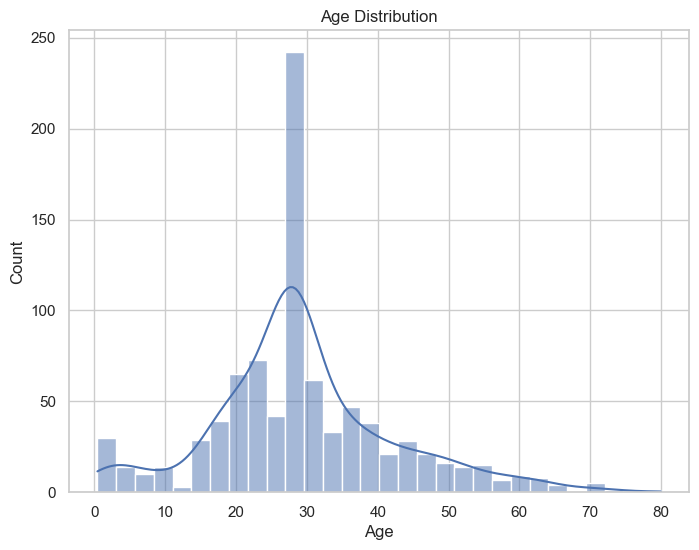

In [26]:
# Plot the distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(titanic_df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

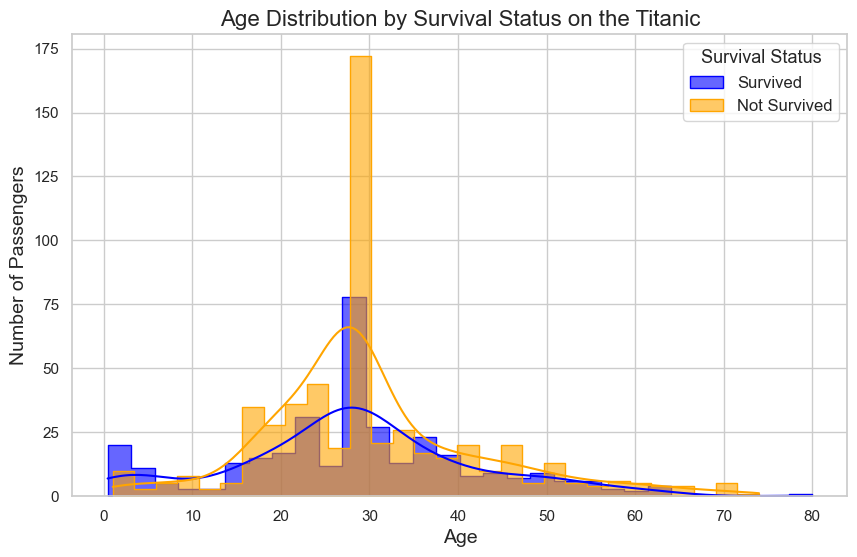

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df[titanic_df['Survived'] == 1]['Age'], bins=30, kde=True, color='blue', label='Survived', alpha=0.6, element="step", fill=True)
sns.histplot(titanic_df[titanic_df['Survived'] == 0]['Age'], bins=30, kde=True, color='orange', label='Not Survived', alpha=0.6, element="step", fill=True)

plt.title('Age Distribution by Survival Status on the Titanic', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)

plt.legend(title='Survival Status', title_fontsize='13', fontsize='12')

plt.grid(True)
plt.show()

In [28]:
le_sex = LabelEncoder()
titanic_df['Sex'] = le_sex.fit_transform(titanic_df['Sex'])

le_embarked = LabelEncoder()
titanic_df['Embarked'] = le_embarked.fit_transform(titanic_df['Embarked'])

X = titanic_df.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.head())

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
331       1    1  45.5      0      0  28.5000         2
733       2    1  23.0      0      0  13.0000         2
382       3    1  32.0      0      0   7.9250         2
704       3    1  26.0      1      0   7.8542         2
813       3    0   6.0      4      2  31.2750         2


In [29]:
le_sex = LabelEncoder()
titanic_df['Sex'] = le_sex.fit_transform(titanic_df['Sex'])

le_embarked = LabelEncoder()
titanic_df['Embarked'] = le_embarked.fit_transform(titanic_df['Embarked'])

titanic_df['Pclass'] = titanic_df['Pclass'].astype(str)

le_pclass = LabelEncoder()
titanic_df['Pclass'] = le_pclass.fit_transform(titanic_df['Pclass'])

X = titanic_df.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = titanic_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

predictions_df = X_test.copy()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_pred

print(predictions_df.head(15))
predictions_df.to_csv('titanic_predictions.csv', index=False)

Accuracy: 0.8100558659217877
Confusion Matrix:
[[90 15]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Actual  Predicted
709       2    1  28.0      1      1  15.2458         0       1          0
439       1    1  31.0      0      0  10.5000         2       0          0
840       2    1  20.0      0      0   7.9250         2       0          0
720       1    0   6.0      0      1  33.0000         2       1          1
39        2    0  14.0      1      0  11.2417         0       1          1
290       0    0  26.0      0      0  78.8500         2       1          1
300       2    0  28.0      0      0   7.7500         1    